In [1]:
import os
import zipfile
from google.colab import files

# Step 1: Upload Kaggle API token
print("Please upload your kaggle.json file from Kaggle (download from https://www.kaggle.com/settings)")
uploaded = files.upload()

# Move kaggle.json to the correct location
os.makedirs('/root/.kaggle', exist_ok=True)
if 'kaggle.json' in uploaded:
    os.system('mv kaggle.json /root/.kaggle/kaggle.json')
    os.system('chmod 600 /root/.kaggle/kaggle.json')
    print("kaggle.json uploaded and configured")
else:
    print("Error: kaggle.json not uploaded. Please upload the correct file.")
    raise FileNotFoundError("kaggle.json not found")

# Step 2: Install Kaggle CLI
print("\nInstalling Kaggle CLI...")
!pip install kaggle --quiet
print("Kaggle CLI installed")

# Step 3: Download AAU RainSnow dataset
dataset_name = 'aalborguniversity/aau-rainsnow'
# Construct the expected zip path based on the dataset name
zip_path = os.path.join('/content', dataset_name.split('/')[-1] + '.zip')
print(f"\nDownloading dataset {dataset_name}...")
result = os.system(f'kaggle datasets download -d {dataset_name} -p /content')
# Check for the downloaded file at the correct path
if result == 0 and os.path.exists(zip_path):
    print(f"Downloaded dataset to {zip_path}")
else:
    print(f"Error: Failed to download dataset. Exit code: {result}")
    raise FileNotFoundError("Dataset download failed. Please check Kaggle API token or network connection.")

# Step 4: Extract the dataset
extract_dir = '/content/aau_extracted'
print(f"\nExtracting {zip_path}...")
if os.path.exists(extract_dir):
    os.system(f"rm -rf {extract_dir}")  # Remove previous extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Extracted to {extract_dir}")

# Step 5: Verify contents
print("\nDirectory structure of extracted files:")
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}    {f}")

# Check for aauRainSnow-rgb.json
json_file = None
for root, _, files in os.walk(extract_dir):
    if 'aauRainSnow-rgb.json' in files:
        json_file = os.path.join(root, 'aauRainSnow-rgb.json')
        break

if json_file:
    print(f"\nFound aauRainSnow-rgb.json at: {json_file}")
else:
    print("\nError: aauRainSnow-rgb.json not found.")

# Check for images
image_files = []
for root, _, files in os.walk(extract_dir):
    image_files.extend([os.path.join(root, f) for f in files if f.endswith('.png') and f.startswith('cam1-')])

print(f"\nFound {len(image_files)} images (cam1-*.png)")
if image_files:
    print("Example image files:", image_files[:5])
else:
    print("Error: No cam1-*.png images found.")

Please upload your kaggle.json file from Kaggle (download from https://www.kaggle.com/settings)


Streaming output truncated to the last 5000 lines.
                        cam1-03338.png
                        cam1-01375.png
                        cam1-01159.png
                        cam1-02341.png
                        cam1-02970.png
                        cam1-04970.png
                        cam1-05236.png
                        cam1-02676.png
                        cam1-01562.png
                        cam1-02708.png
                        cam1-05268.png
                        cam1-02384.png
                        cam1-05085.png
                        cam1-03407.png
                        cam1-00171.png
                        cam1-03987.png
                        cam1-02271.png
                        cam1-00696.png
                        cam1-02961.png
                        cam1-05795.png
                        cam1-00964.png
                        cam1-05851.png
                        cam1-04272.png
                        cam1-04452.png
             

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
base_dir = '/content/aau_rainsnow_dataset'
image_dir = os.path.join(base_dir, 'train/images')
val_image_dir = os.path.join(base_dir, 'val/images')
label_dir = os.path.join(base_dir, 'train/labels')
val_label_dir = os.path.join(base_dir, 'val/labels')

# Create directories
os.makedirs(image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Source directory for images
source_image_dir = '/content/aau_extracted/Hjorringvej/Hjorringvej-1/rgbMasks'

# Copy aauRainSnow-rgb.json to base_dir
json_source = '/content/aau_extracted/aauRainSnow-rgb.json'
json_destination = os.path.join(base_dir, 'aauRainSnow-rgb.json')
if os.path.exists(json_source):
    shutil.copy(json_source, json_destination)
    print(f"Copied {json_source} to {json_destination}")
else:
    print(f"Error: {json_source} not found.")
    raise FileNotFoundError("JSON file not found")

# Get list of cam1-*.png images
image_files = [f for f in os.listdir(source_image_dir) if f.endswith('.png') and f.startswith('cam1-')]
if not image_files:
    print(f"Error: No cam1-*.png images found in {source_image_dir}")
    raise FileNotFoundError("No images found")

print(f"Found {len(image_files)} images in {source_image_dir}")

# Split images into train and validation sets (80-20 split)
train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

# Move images to train and validation directories
for img in train_images:
    shutil.copy(os.path.join(source_image_dir, img), os.path.join(image_dir, img))
for img in val_images:
    shutil.copy(os.path.join(source_image_dir, img), os.path.join(val_image_dir, img))

print(f"Training images: {len(os.listdir(image_dir))}")
print(f"Validation images: {len(os.listdir(val_image_dir))}")
print("Images moved to respective directories")
print("Example training images:", os.listdir(image_dir)[:5])
print("Example validation images:", os.listdir(val_image_dir)[:5])

Copied /content/aau_extracted/aauRainSnow-rgb.json to /content/aau_rainsnow_dataset/aauRainSnow-rgb.json
Found 100 images in /content/aau_extracted/Hjorringvej/Hjorringvej-1/rgbMasks
Training images: 80
Validation images: 20
Images moved to respective directories
Example training images: ['cam1-05600.png', 'cam1-05372.png', 'cam1-00058.png', 'cam1-05754.png', 'cam1-04777.png']
Example validation images: ['cam1-00169.png', 'cam1-04038.png', 'cam1-05674.png', 'cam1-00227.png', 'cam1-04685.png']


In [3]:
import os
import json
import shutil

# Define directories
base_dir = '/content/aau_rainsnow_dataset'
train_image_dir = os.path.join(base_dir, 'train/images')
val_image_dir = os.path.join(base_dir, 'val/images')
train_label_dir = os.path.join(base_dir, 'train/labels')
val_label_dir = os.path.join(base_dir, 'val/labels')
json_path = os.path.join(base_dir, 'aauRainSnow-rgb.json')

# Load COCO annotations
with open(json_path, 'r') as f:
    coco_data = json.load(f)

# Find the class ID for "car"
class_name = 'car'
class_id = None
for category in coco_data['categories']:
    if category['name'].lower() == class_name:
        class_id = category['id']
        break

if class_id is None:
    print(f"Error: Class '{class_name}' not found in COCO annotations.")
    raise ValueError("Class 'car' not found")

print(f"Found class '{class_name}' with ID {class_id}")

# Create a mapping of image ID to file name
image_id_to_filename = {img['id']: img['file_name'] for img in coco_data['images']}

# Initialize dictionaries for train and val annotations
train_annotations = []
val_annotations = []

# Group annotations by image
for ann in coco_data['annotations']:
    if ann['category_id'] == class_id:  # Filter for "car" class
        image_filename = image_id_to_filename.get(ann['image_id'])
        if not image_filename:
            continue
        # Check if image is in train or val directory
        if os.path.exists(os.path.join(train_image_dir, os.path.basename(image_filename))):
            train_annotations.append(ann)
        elif os.path.exists(os.path.join(val_image_dir, os.path.basename(image_filename))):
            val_annotations.append(ann)

print(f"Found {len(train_annotations)} car annotations for training images")
print(f"Found {len(val_annotations)} car annotations for validation images")

# Function to convert COCO bbox to YOLO format
def coco_to_yolo(bbox, img_width, img_height):
    x_min, y_min, width, height = bbox
    x_center = (x_min + width / 2) / img_width
    y_center = (y_min + height / 2) / img_height
    width = width / img_width
    height = height / img_height
    return [x_center, y_center, width, height]

# Process annotations for train and val
for split, annotations, label_dir in [
    ('train', train_annotations, train_label_dir),
    ('val', val_annotations, val_label_dir)
]:
    print(f"\nProcessing {split} annotations...")
    # Group annotations by image
    annotations_by_image = {}
    for ann in annotations:
        image_id = ann['image_id']
        if image_id not in annotations_by_image:
            annotations_by_image[image_id] = []
        annotations_by_image[image_id].append(ann)

    # Create label files
    for image_id, anns in annotations_by_image.items():
        image_filename = image_id_to_filename.get(image_id)
        if not image_filename:
            continue
        image_info = next((img for img in coco_data['images'] if img['id'] == image_id), None)
        if not image_info:
            continue
        img_width, img_height = image_info['width'], image_info['height']
        label_file = os.path.join(label_dir, os.path.splitext(os.path.basename(image_filename))[0] + '.txt')

        with open(label_file, 'w') as f:
            for ann in anns:
                yolo_bbox = coco_to_yolo(ann['bbox'], img_width, img_height)
                f.write(f"0 {yolo_bbox[0]} {yolo_bbox[1]} {yolo_bbox[2]} {yolo_bbox[3]}\n")

    print(f"Created {len(annotations_by_image)} label files in {label_dir}")

# Create data.yaml for YOLO
data_yaml = f"""
train: {train_image_dir}
val: {val_image_dir}
nc: 1
names: ['car']
"""
yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)
print(f"\nCreated data.yaml at {yaml_path}")

Found class 'car' with ID 3
Found 362 car annotations for training images
Found 58 car annotations for validation images

Processing train annotations...
Created 105 label files in /content/aau_rainsnow_dataset/train/labels

Processing val annotations...
Created 23 label files in /content/aau_rainsnow_dataset/val/labels

Created data.yaml at /content/aau_rainsnow_dataset/data.yaml


In [4]:
import os
import sys

# Step 1: Install Ultralytics YOLOv8
print("Installing Ultralytics YOLOv8...")
!pip install ultralytics --quiet
print("Installation command executed")

# Verify Ultralytics installation
try:
    from ultralytics import YOLO
    print("Ultralytics YOLOv8 successfully imported")
except ModuleNotFoundError:
    print("Error: Ultralytics installation failed. Attempting to install again...")
    !pip install ultralytics
    from ultralytics import YOLO
    print("Ultralytics YOLOv8 installed and imported after retry")

# Step 2: Verify dataset paths
data_yaml = '/content/aau_rainsnow_dataset/data.yaml'
train_image_dir = '/content/aau_rainsnow_dataset/train/images'
val_image_dir = '/content/aau_rainsnow_dataset/val/images'
train_label_dir = '/content/aau_rainsnow_dataset/train/labels'
val_label_dir = '/content/aau_rainsnow_dataset/val/labels'

# Check if paths exist
for path in [data_yaml, train_image_dir, val_image_dir, train_label_dir, val_label_dir]:
    if not os.path.exists(path):
        print(f"Error: {path} does not exist.")
        raise FileNotFoundError(f"Path {path} not found")

print(f"\nDataset paths verified:")
print(f"data.yaml: {data_yaml}")
print(f"Training images: {len(os.listdir(train_image_dir))} files")
print(f"Validation images: {len(os.listdir(val_image_dir))} files")
print(f"Training labels: {len(os.listdir(train_label_dir))} files")
print(f"Validation labels: {len(os.listdir(val_label_dir))} files")

# Step 3: Load pre-trained YOLOv8 model
print("\nLoading pre-trained YOLOv8 model...")
model = YOLO('yolov8n.pt')  # Lightweight model for faster training

# Step 4: Train the model
print("\nTraining YOLOv8 model...")
results = model.train(
    data=data_yaml,
    epochs=10,  # Adjust as needed (e.g., 50 for better results)
    imgsz=640,  # Image size (AAU images are 1920x1080, scaled to 640)
    batch=16,   # Adjust based on GPU memory
    name='aau_rainsnow_car_detection',
    project='/content/runs',
    device=0,   # Use GPU if available
    patience=10  # Early stopping
)

# Step 5: Evaluate the model on validation set
print("\nEvaluating model on validation set...")
val_results = model.val()

# Step 6: Save the trained model
model_path = '/content/aau_rainsnow_yolov8.pt'
model.save(model_path)
print(f"Trained model saved to {model_path}")

# Print evaluation metrics
print("\nValidation Results:")
print(f"mAP@50: {val_results.box.map50:.4f}")
print(f"mAP@50:95: {val_results.box.map:.4f}")

Installing Ultralytics YOLOv8...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.7 MB/s eta 0:00:00
Installation c


Training YOLOv8 model...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aau_rainsnow_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=aau_rainsnow_car_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.5±0.5 MB/s, size: 1.8 KB)


train: Scanning /content/aau_rainsnow_dataset/train/labels... 75 images, 5 backgrounds, 9 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1127.65it/s]

train: /content/aau_rainsnow_dataset/train/images/cam1-00895.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02350.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02384.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02423.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02853.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02915.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02946.png: ignoring c

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.7±14.5 MB/s, size: 1.9 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels... 19 images, 1 backgrounds, 2 corrupt: 100%|██████████| 20/20 [00:00<00:00, 527.80it/s]

val: /content/aau_rainsnow_dataset/val/images/cam1-02454.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
val: /content/aau_rainsnow_dataset/val/images/cam1-02970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
val: New cache created: /content/aau_rainsnow_dataset/val/labels.cache


Plotting labels to /content/runs/aau_rainsnow_car_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/aau_rainsnow_car_detection
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         2G      1.514      4.441      1.163         17        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         18         39    0.00444      0.615     0.0444     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.03G      1.333      4.158      1.084         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         18         39    0.00463      0.641     0.0326     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.04G      1.196      3.204     0.9911         13        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         18         39      0.005      0.692       0.23      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.06G      1.036      2.394      0.974         15        640: 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18         39      0.005      0.692       0.22      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.08G       1.01      2.555      1.014         13        640: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         18         39    0.00426       0.59      0.165      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.1G     0.9203      2.138     0.9279         19        640: 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         18         39    0.00426       0.59      0.151      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.12G     0.8569      2.125     0.9518         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         18         39    0.00407      0.564      0.109     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.13G      0.764      1.922      0.895         17        640: 100%|██████████| 5/5 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         18         39    0.00481      0.667     0.0954     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.16G     0.8403      2.016     0.9081         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         18         39    0.00481      0.667     0.0949     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.16G     0.8859      1.874     0.9241         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         18         39    0.00519      0.718      0.098     0.0855



10 epochs completed in 0.005 hours.
Optimizer stripped from /content/runs/aau_rainsnow_car_detection/weights/last.pt, 6.2MB
Optimizer stripped from /content/runs/aau_rainsnow_car_detection/weights/best.pt, 6.2MB

Validating /content/runs/aau_rainsnow_car_detection/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


                   all         18         39      0.005      0.692      0.232      0.179
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/runs/aau_rainsnow_car_detection

Evaluating model on validation set...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 116.3±43.3 MB/s, size: 1.7 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 2 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

val: /content/aau_rainsnow_dataset/val/images/cam1-02454.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
val: /content/aau_rainsnow_dataset/val/images/cam1-02970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


                   all         18         39      0.005      0.692      0.232      0.179
Speed: 3.6ms preprocess, 12.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/aau_rainsnow_car_detection2
Trained model saved to /content/aau_rainsnow_yolov8.pt

Validation Results:
mAP@50: 0.2324
mAP@50:95: 0.1794


In [5]:
import os
import torch
from ultralytics import YOLO

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"\nUsing device: {device}")
if device == 'cpu':
    print("Warning: GPU not available. Training on CPU will be slower.")

data_yaml = '/content/aau_rainsnow_dataset/data.yaml'
train_image_dir = '/content/aau_rainsnow_dataset/train/images'
val_image_dir = '/content/aau_rainsnow_dataset/val/images'
train_label_dir = '/content/aau_rainsnow_dataset/train/labels'
val_label_dir = '/content/aau_rainsnow_dataset/val/labels'

for path in [data_yaml, train_image_dir, val_image_dir, train_label_dir, val_label_dir]:
    if not os.path.exists(path):
        print(f"Error: {path} does not exist.")
        raise FileNotFoundError(f"Path {path} not found")

print(f"\nDataset paths verified:")
print(f"data.yaml: {data_yaml}")
print(f"Training images: {len(os.listdir(train_image_dir))} files")
print(f"Validation images: {len(os.listdir(val_image_dir))} files")
print(f"Training labels: {len(os.listdir(train_label_dir))} files")
print(f"Validation labels: {len(os.listdir(val_label_dir))} files")


print("\nLoading pre-trained YOLOv8 model...")
model = YOLO('yolov8n.pt')


print("\nTraining YOLOv8 model...")
results = model.train(
    data=data_yaml,
    epochs=20,
    imgsz=640,
    batch=16,
    name='aau_rainsnow_car_detection',
    project='/content/runs',
    device=device,
    patience=10,
    augment=True,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    flipud=0.5, fliplr=0.5,
    mosaic=1.0,
)


print("\nEvaluating model on validation set...")
val_results = model.val()

model_path = '/content/aau_rainsnow_yolov8.pt'
model.save(model_path)
print(f"Trained model saved to {model_path}")

print("\nValidation Results:")
print(f"mAP@50: {val_results.box.map50:.4f}")
print(f"mAP@50:95: {val_results.box.map:.4f}")


Using device: cuda

Dataset paths verified:
data.yaml: /content/aau_rainsnow_dataset/data.yaml
Training images: 80 files
Validation images: 20 files
Training labels: 75 files
Validation labels: 19 files

Loading pre-trained YOLOv8 model...

Training YOLOv8 model...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aau_rainsnow_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01,

train: Scanning /content/aau_rainsnow_dataset/train/labels.cache... 75 images, 5 backgrounds, 9 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

train: /content/aau_rainsnow_dataset/train/images/cam1-00895.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02350.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02384.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02423.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02853.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02915.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/aau_rainsnow_dataset/train/images/cam1-02946.png: ignoring c

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 44.7±24.3 MB/s, size: 1.9 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 2 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

val: /content/aau_rainsnow_dataset/val/images/cam1-02454.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
val: /content/aau_rainsnow_dataset/val/images/cam1-02970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]


Plotting labels to /content/runs/aau_rainsnow_car_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/aau_rainsnow_car_detection3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.12G      1.557      4.194      1.118         44        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         18         39    0.00426       0.59     0.0363     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.12G      1.406      3.991      1.031         40        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         18         39      0.005      0.692     0.0718     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.12G       1.11      2.607     0.9402         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         18         39      0.005      0.692       0.22       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.12G      1.035      2.019     0.9704         19        640: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         18         39      0.005      0.692      0.194      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.14G     0.9618      1.856     0.9481         41        640: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         18         39      0.005      0.692      0.126     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.14G      1.005       1.74     0.9807         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         18         39      0.005      0.692      0.137      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.14G      1.001      1.735      1.008         27        640: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         18         39      0.005      0.692      0.113     0.0898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.15G     0.9384       1.78     0.9134         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         18         39    0.00537      0.744      0.135      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.15G     0.9554      1.777     0.9458         26        640: 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         18         39    0.00537      0.744     0.0938     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.15G     0.8785      1.555     0.9759         25        640: 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         18         39    0.00556      0.769     0.0195    0.00791


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.15G     0.8087      1.953     0.9361         14        640: 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         18         39    0.00556      0.769      0.109     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.15G     0.7639      1.811     0.8962         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         18         39    0.00537      0.744      0.153      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.15G     0.8206      1.809     0.9351         19        640: 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         18         39    0.00556      0.769     0.0711     0.0625
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

13 epochs completed in 0.008 hours.
Optimizer stripped from /content/runs/aau_rainsnow_car_detection3/weights/last.pt, 6.2MB
Optimizer stripped from /content/runs/aau_rainsnow_car_detection3/weights/best.pt, 6.2MB

Validating /content/runs/aau_rainsnow_car_detection3/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


                   all         18         39      0.005      0.692      0.201      0.136
Speed: 0.1ms preprocess, 10.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/aau_rainsnow_car_detection3

Evaluating model on validation set...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 110.3±42.7 MB/s, size: 1.7 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 2 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

val: /content/aau_rainsnow_dataset/val/images/cam1-02454.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
val: /content/aau_rainsnow_dataset/val/images/cam1-02970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         18         39      0.005      0.692      0.201      0.136
Speed: 3.7ms preprocess, 34.3ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/aau_rainsnow_car_detection32
Trained model saved to /content/aau_rainsnow_yolov8.pt

Validation Results:
mAP@50: 0.2006
mAP@50:95: 0.1359


In [6]:
import os

def check_and_fix_labels(label_dir):
    invalid_files = []
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()
            valid_lines = []
            is_valid = True
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    is_valid = False
                    continue
                try:
                    coords = [float(x) for x in parts[1:]]
                    if any(c <= 0 or c >= 1 for c in coords):
                        is_valid = False
                        print(f"Invalid coordinates in {label_file}: {coords}")
                    else:
                        valid_lines.append(line)
                except ValueError:
                    is_valid = False
                    print(f"Non-numeric values in {label_file}: {line.strip()}")
            if not is_valid:
                invalid_files.append(label_file)

                with open(label_path, 'w') as f:
                    f.writelines(valid_lines)
                print(f"Fixed {label_file} by keeping only valid lines")
    return invalid_files

train_label_dir = '/content/aau_rainsnow_dataset/train/labels'
val_label_dir = '/content/aau_rainsnow_dataset/val/labels'

print("Checking training labels...")
invalid_train = check_and_fix_labels(train_label_dir)
print(f"Invalid training label files: {invalid_train}")

print("\nChecking validation labels...")
invalid_val = check_and_fix_labels(val_label_dir)
print(f"Invalid validation label files: {invalid_val}")

Checking training labels...
Invalid coordinates in cam1-00895.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-00895.txt by keeping only valid lines
Invalid coordinates in cam1-02946.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-02946.txt by keeping only valid lines
Invalid coordinates in cam1-02384.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-02384.txt by keeping only valid lines
Invalid coordinates in cam1-02423.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-02423.txt by keeping only valid lines
Invalid coordinates in cam1-02915.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-02915.txt by keeping only valid lines
Invalid coordinates in cam1-02853.txt: [0.78125, 1.0416666666666667, -1.5625, -2.0833333333333335]
Fixed cam1-02853.txt by keeping only valid lines
Invalid coordinates in cam1-02350.txt: [0.78125, 1.0416666666666667, -1.5625, -2.083


image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-00169.png: 480x640 (no detections), 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


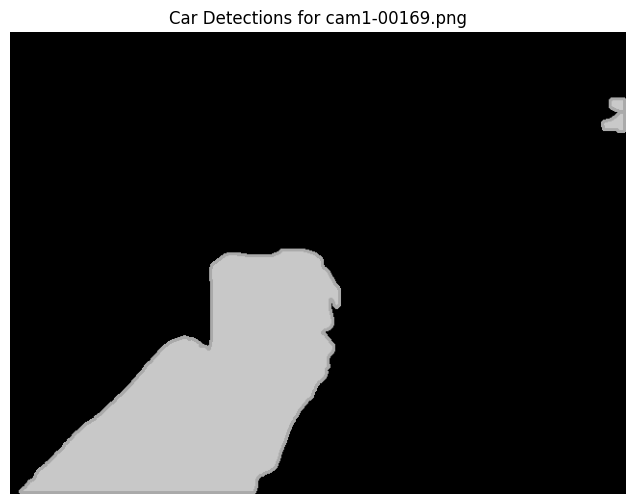

Saved detection image to /content/detections_cam1-00169.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-04038.png: 480x640 (no detections), 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


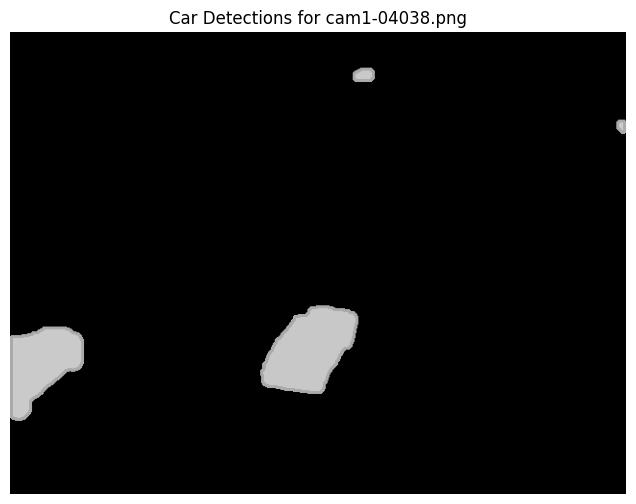

Saved detection image to /content/detections_cam1-04038.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-05674.png: 480x640 (no detections), 12.3ms
Speed: 2.2ms preprocess, 12.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


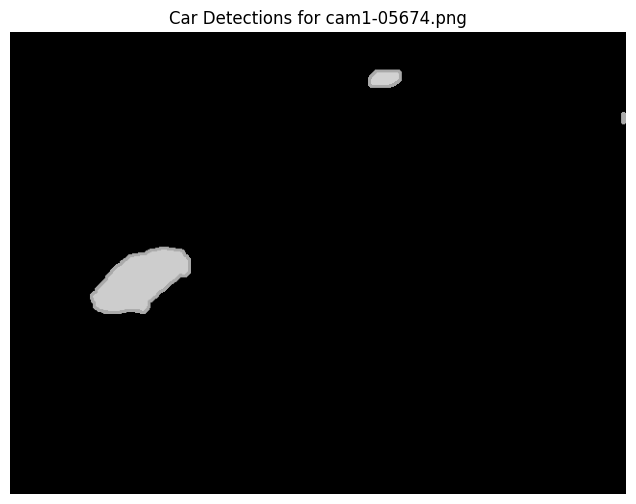

Saved detection image to /content/detections_cam1-05674.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-00227.png: 480x640 (no detections), 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


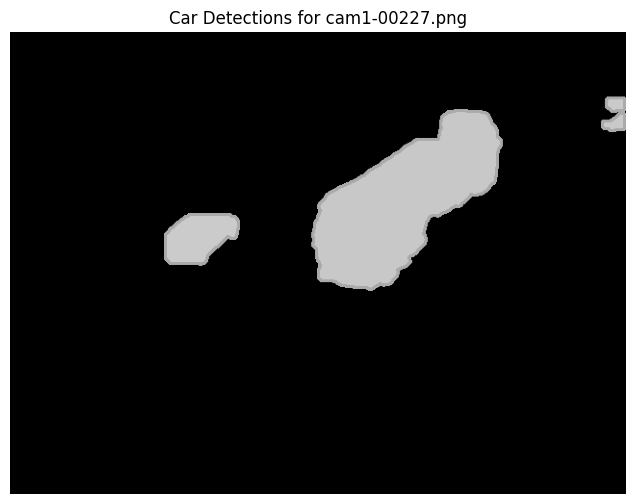

Saved detection image to /content/detections_cam1-00227.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-04685.png: 480x640 (no detections), 7.1ms
Speed: 1.7ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


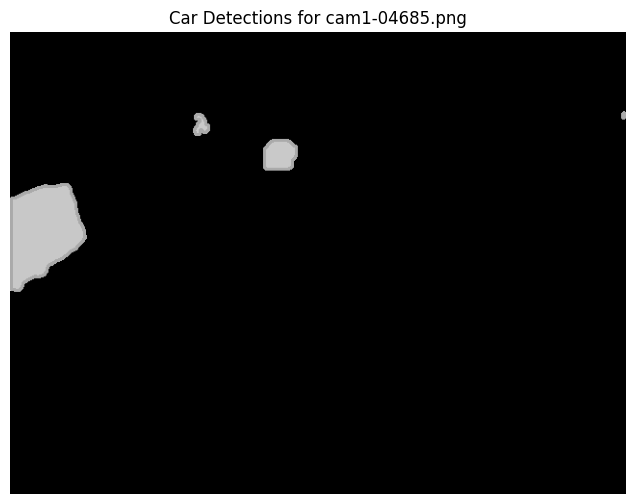

Saved detection image to /content/detections_cam1-04685.png


In [7]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt


model = YOLO('/content/runs/aau_rainsnow_car_detection3/weights/best.pt')


val_image_dir = '/content/aau_rainsnow_dataset/val/images'

sample_images = [f for f in os.listdir(val_image_dir) if f.endswith('.png') and f not in ['cam1-02350.png', 'cam1-02853.png', 'cam1-02970.png']][:5]

for img_name in sample_images:
    img_path = os.path.join(val_image_dir, img_name)

    results = model.predict(img_path, conf=0.5, iou=0.7)


    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    annotated_img = results[0].plot()


    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.title(f'Car Detections for {img_name}')
    plt.axis('off')
    plt.show()

    save_path = f'/content/detections_{img_name}'
    cv2.imwrite(save_path, cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))
    print(f"Saved detection image to {save_path}")

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

results = model.train(
    data='/content/aau_rainsnow_dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    lr0=0.001,
    name='aau_rainsnow_car_detection_improved',
    project='/content/runs',
    device='cuda',
    augment=True,
    hsv_h=0.02,
    hsv_s=0.8,
    hsv_v=0.5,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    erasing=0.4,
    patience=20
)

print("Training completed. Model saved to /content/runs/aau_rainsnow_car_detection_improved/")

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aau_rainsnow_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=aau_rainsnow_car_detection_improved, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0

train: Scanning /content/aau_rainsnow_dataset/train/labels... 75 images, 5 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 2649.07it/s]

train: New cache created: /content/aau_rainsnow_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 68.2±54.1 MB/s, size: 1.9 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1639.46it/s]

val: New cache created: /content/aau_rainsnow_dataset/val/labels.cache


Plotting labels to /content/runs/aau_rainsnow_car_detection_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/aau_rainsnow_car_detection_improved
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.86G      1.953      4.509      1.279         43        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         20         43      0.554      0.405      0.394      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.03G      1.254      3.317      1.073         78        640: 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         20         43      0.823      0.431       0.44      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.05G      1.087      1.939      1.037         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         20         43      0.772      0.512      0.551      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.023      2.025      1.019         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         20         43      0.758      0.364      0.421      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G     0.9695      1.516     0.9939         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         20         43     0.0985      0.837     0.0877      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G      1.041      1.375      1.026         31        640: 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]

                   all         20         43      0.113      0.837      0.101     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      1.069      1.338      1.041         47        640: 100%|██████████| 10/10 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]

                   all         20         43      0.598      0.767      0.672      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G     0.9598      1.389       1.01         30        640: 100%|██████████| 10/10 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.93it/s]


                   all         20         43      0.566      0.884      0.688      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.248       1.62      1.138         53        640: 100%|██████████| 10/10 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         20         43      0.598      0.884      0.689      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      1.022      1.538      1.005         39        640: 100%|██████████| 10/10 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]


                   all         20         43      0.576      0.759       0.64      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G      1.187      1.421      1.081         54        640: 100%|██████████| 10/10 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]

                   all         20         43      0.621      0.884      0.698      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G     0.9373      1.019     0.9459         52        640: 100%|██████████| 10/10 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]

                   all         20         43      0.637      0.814        0.7      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G      1.097      1.321      1.064         19        640: 100%|██████████| 10/10 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         20         43        0.6      0.791      0.691      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.23G     0.9241       1.22     0.9758         26        640: 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         20         43      0.568      0.767      0.602      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.23G     0.9823      1.353      1.057         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         20         43      0.611      0.791       0.63      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.23G     0.8859      1.244     0.9702         33        640: 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         20         43      0.627      0.837      0.651      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.27G      0.776      1.076      0.936         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]


                   all         20         43      0.526      0.884      0.639       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.27G     0.9835      1.195      1.051         46        640: 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all         20         43      0.672      0.651      0.635      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.27G     0.8633      1.086      0.969         51        640: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.75it/s]

                   all         20         43      0.658      0.674      0.674      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.31G     0.9626      1.341      1.023         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         20         43      0.695      0.651      0.684      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G       1.02      1.374      1.075         43        640: 100%|██████████| 10/10 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]


                   all         20         43      0.735      0.581       0.61      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.34G     0.8128      1.091     0.9864         46        640: 100%|██████████| 10/10 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]

                   all         20         43      0.666      0.884      0.742      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.34G     0.8216      1.099     0.9857         49        640: 100%|██████████| 10/10 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         20         43       0.65      0.865      0.731      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.37G     0.9866      1.248      1.056         35        640: 100%|██████████| 10/10 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]

                   all         20         43       0.67      0.899      0.727      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G     0.8922      1.217      1.021         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         20         43      0.679      0.907      0.721      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G     0.8267      1.049       1.01         67        640: 100%|██████████| 10/10 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         20         43      0.671      0.884      0.758      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.37G     0.9263      1.237      1.064         55        640: 100%|██████████| 10/10 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all         20         43      0.682      0.898      0.744      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.42G     0.8872      1.251      1.005         45        640: 100%|██████████| 10/10 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]

                   all         20         43      0.684      0.907      0.758      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.55G     0.7788      1.097     0.9743         35        640: 100%|██████████| 10/10 [00:01<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         20         43      0.731       0.86       0.78      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.55G     0.8667      1.159      1.002         35        640: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         20         43      0.708       0.86      0.787       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.57G     0.6332     0.8981     0.8816         38        640: 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]


                   all         20         43      0.703       0.86      0.788      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.57G     0.8759      1.242     0.9964         67        640: 100%|██████████| 10/10 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]

                   all         20         43      0.723       0.86      0.797      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.57G     0.7239      0.911     0.9281         41        640: 100%|██████████| 10/10 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]


                   all         20         43      0.714       0.86      0.812      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.57G     0.7405       1.12     0.9243         38        640: 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all         20         43      0.907      0.721      0.834      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.57G       0.79      1.132     0.9699         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         20         43      0.867      0.767      0.834      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.57G     0.7719      1.033     0.9672         43        640: 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]

                   all         20         43      0.819      0.767      0.807      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.57G     0.7225      1.033     0.9567         26        640: 100%|██████████| 10/10 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]

                   all         20         43      0.703      0.884      0.788      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.57G     0.6846     0.9829     0.9332         39        640: 100%|██████████| 10/10 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]


                   all         20         43      0.738      0.884      0.785      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.57G     0.7258      1.022     0.9476         43        640: 100%|██████████| 10/10 [00:01<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]

                   all         20         43      0.741      0.864      0.787      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.57G     0.6089     0.8606     0.9097         40        640: 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         20         43      0.795      0.811      0.806      0.753


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.57G     0.7319      1.138     0.9687         15        640: 100%|██████████| 10/10 [00:02<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         20         43      0.768      0.791      0.804      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.57G     0.6473      1.002     0.9425         32        640: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]

                   all         20         43      0.776      0.837      0.818      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.57G     0.7431      1.055     0.9682         32        640: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         20         43      0.751      0.837      0.821      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.57G     0.6679      1.024     0.9471         19        640: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]

                   all         20         43      0.744      0.879      0.819      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.57G     0.7212     0.9905      0.969         11        640: 100%|██████████| 10/10 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         20         43      0.715      0.884      0.814      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.57G     0.6449     0.9897     0.9133         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         20         43      0.713      0.884      0.808      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.57G     0.6229     0.9556     0.9181         23        640: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]


                   all         20         43      0.709      0.884      0.805      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.57G     0.6116     0.8927      0.938         16        640: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         20         43      0.712      0.884      0.806      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.57G     0.5919     0.8921     0.9056         24        640: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]


                   all         20         43      0.715      0.884      0.805      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.57G      0.554     0.8531     0.9072         24        640: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]


                   all         20         43      0.717      0.884      0.808      0.738

50 epochs completed in 0.036 hours.
Optimizer stripped from /content/runs/aau_rainsnow_car_detection_improved/weights/last.pt, 22.5MB
Optimizer stripped from /content/runs/aau_rainsnow_car_detection_improved/weights/best.pt, 22.5MB

Validating /content/runs/aau_rainsnow_car_detection_improved/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         20         43      0.726      0.767      0.791      0.716
Speed: 0.3ms preprocess, 51.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/runs/aau_rainsnow_car_detection_improved
Training completed. Model saved to /content/runs/aau_rainsnow_car_detection_improved/



image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-00169.png: 480x640 1 car, 34.9ms
Speed: 1.4ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


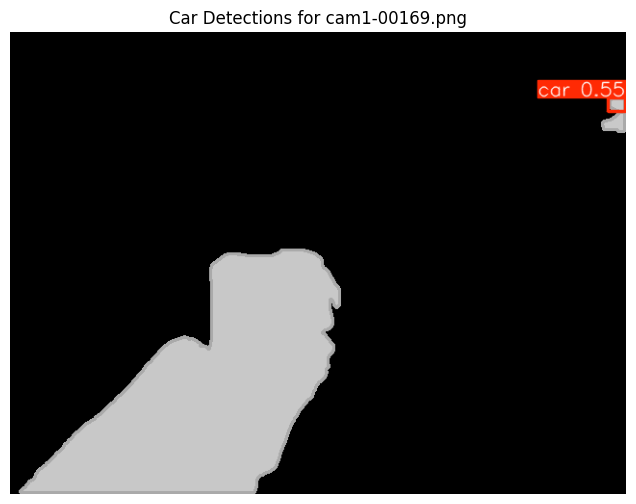

Saved detection image to /content/detections_improved_cam1-00169.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-04038.png: 480x640 3 cars, 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


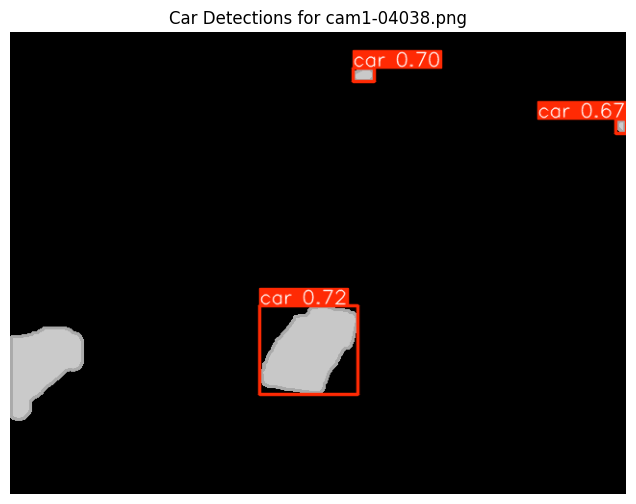

Saved detection image to /content/detections_improved_cam1-04038.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-05674.png: 480x640 2 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


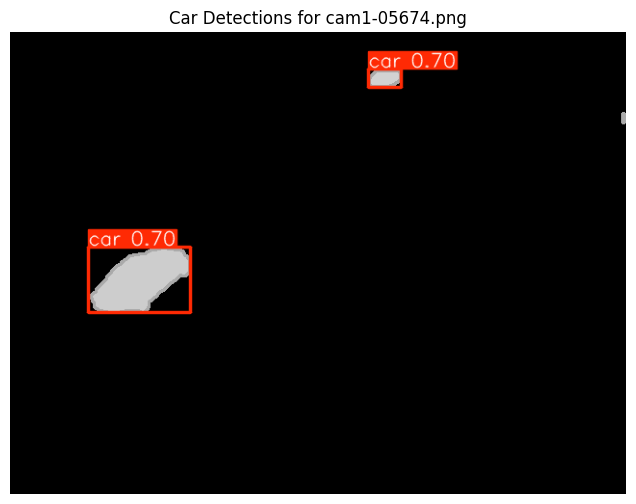

Saved detection image to /content/detections_improved_cam1-05674.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-00227.png: 480x640 3 cars, 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


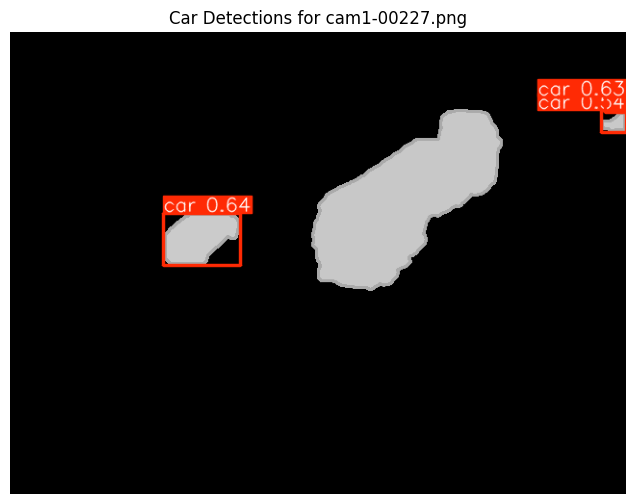

Saved detection image to /content/detections_improved_cam1-00227.png

image 1/1 /content/aau_rainsnow_dataset/val/images/cam1-04685.png: 480x640 1 car, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


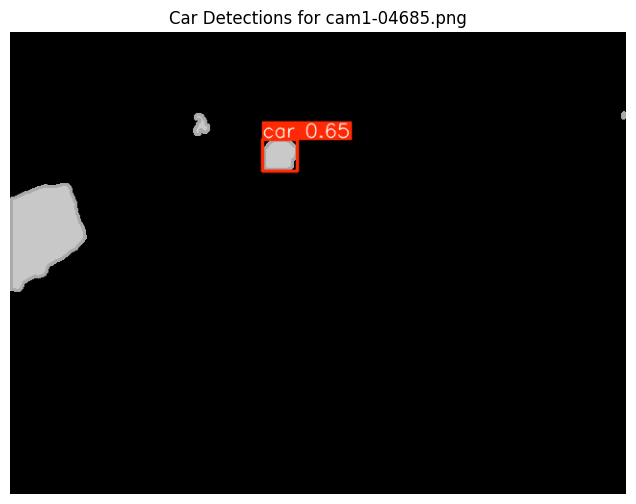

Saved detection image to /content/detections_improved_cam1-04685.png


In [9]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt


model = YOLO('/content/runs/aau_rainsnow_car_detection_improved/weights/best.pt')


val_image_dir = '/content/aau_rainsnow_dataset/val/images'


sample_images = [f for f in os.listdir(val_image_dir) if f.endswith('.png') and f not in ['cam1-02350.png', 'cam1-02853.png', 'cam1-02970.png']][:5]


for img_name in sample_images:
    img_path = os.path.join(val_image_dir, img_name)


    results = model.predict(img_path, conf=0.5, iou=0.7)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    annotated_img = results[0].plot()

    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.title(f'Car Detections for {img_name}')
    plt.axis('off')
    plt.show()


    save_path = f'/content/detections_improved_{img_name}'
    cv2.imwrite(save_path, cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))
    print(f"Saved detection image to {save_path}")

In [10]:
from ultralytics import YOLO
import cv2
import os


model = YOLO('/content/runs/aau_rainsnow_car_detection_improved/weights/best.pt')


video_path = '/content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv'
output_path = '/content/detections_improved_cam1.mp4'


results = model.predict(video_path, conf=0.5, iou=0.7, stream=True)

cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

for result in results:

    annotated_frame = result.plot()
    out.write(cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))

cap.release()
out.release()
print(f"Saved detection video to {output_path}")

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 1001/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 7.3ms
video 1/1 (frame 1002/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 6.8ms
video 1/1 (frame 1003/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 8.6ms
video 1/1 (frame 1004/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 7.0ms
video 1/1 (frame 1005/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 6.9ms
video 1/1 (frame 1006/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 7.6ms
video 1/1 (frame 1007/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 (no detections), 6.7ms
video 1/1 (frame 1008/6000) /content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv: 480x640 1 car, 9.9ms
video 1/1 (frame 1009/6000) /content/aau_extrac


0: 480x640 1 car, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


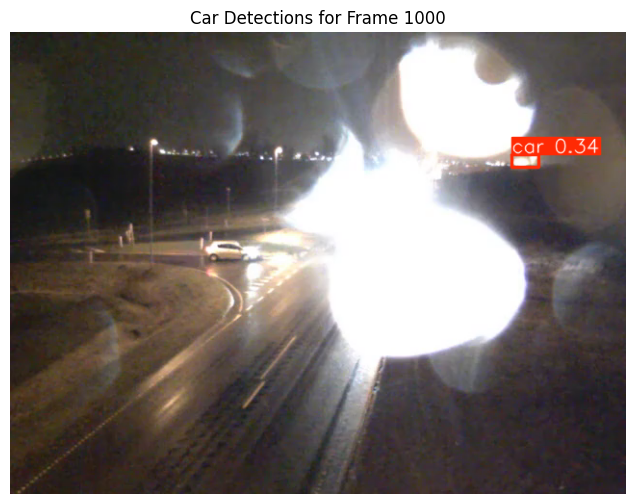

Saved detection image to /content/video_frame_detections/detections_frame_1000.png

0: 480x640 1 car, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


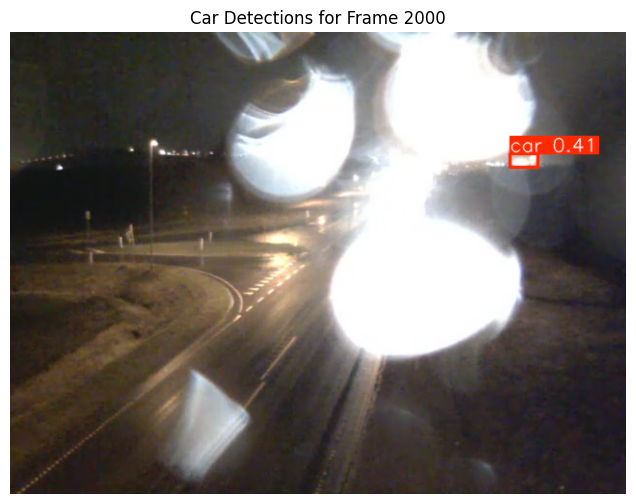

Saved detection image to /content/video_frame_detections/detections_frame_2000.png

0: 480x640 2 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


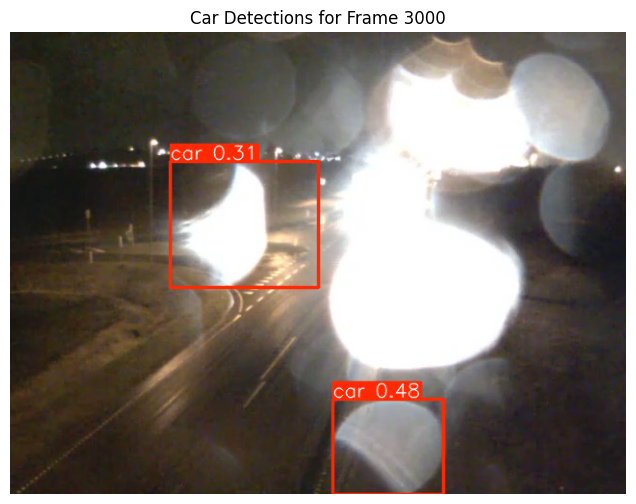

Saved detection image to /content/video_frame_detections/detections_frame_3000.png

0: 480x640 1 car, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


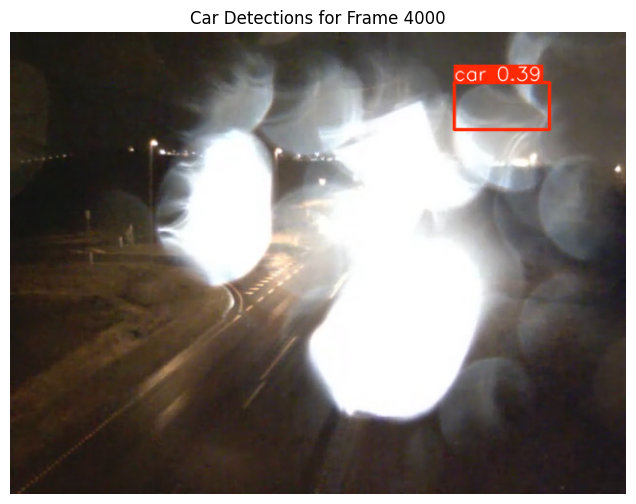

Saved detection image to /content/video_frame_detections/detections_frame_4000.png

0: 480x640 (no detections), 13.2ms
Speed: 2.4ms preprocess, 13.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


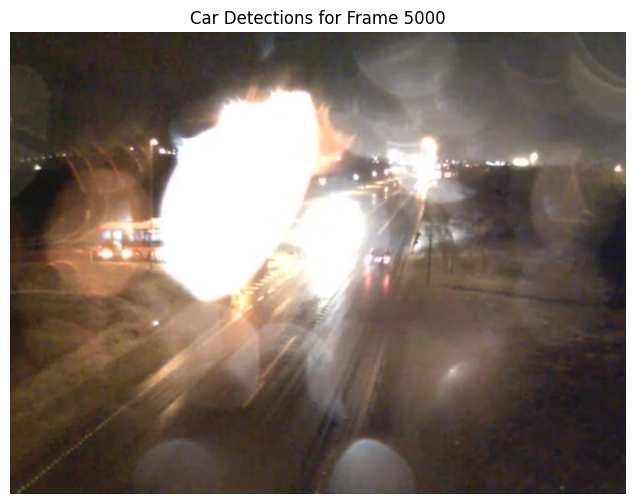

Saved detection image to /content/video_frame_detections/detections_frame_5000.png
Processed 5 frames.


In [11]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt


model = YOLO('/content/runs/aau_rainsnow_car_detection_improved/weights/best.pt')


video_path = '/content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv'
output_dir = '/content/video_frame_detections/'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_indices = [1000, 2000, 3000, 4000, 5000]
frames = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count in frame_indices:
        frames.append((frame_count, frame))
    frame_count += 1
    if frame_count > max(frame_indices):
        break

cap.release()

for frame_idx, frame in frames:

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    results = model.predict(frame_rgb, conf=0.3, iou=0.7)


    annotated_frame = results[0].plot()

    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_frame)
    plt.title(f'Car Detections for Frame {frame_idx}')
    plt.axis('off')
    plt.show()


    save_path = os.path.join(output_dir, f'detections_frame_{frame_idx}.png')
    cv2.imwrite(save_path, cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))
    print(f"Saved detection image to {save_path}")

print(f"Processed {len(frames)} frames.")

In [15]:
import yaml
from ultralytics import YOLO
import pandas as pd

# The data.yaml file was created in cell 5Ka6mnoX6eFR with the correct paths
yaml_path = '/content/aau_rainsnow_dataset/data.yaml'

# Load model (if not already)
# It's better to load the best trained model from the previous step
model = YOLO('/content/runs/aau_rainsnow_car_detection_improved/weights/best.pt')

# Run validation (computes mAP, P, R on val set from JSON annotations)
# Use the updated data_yaml path
results = model.val(data=yaml_path, imgsz=640, batch=16, conf=0.25, iou=0.6)

# Print key metrics
print(f"mAP@0.5: {results.box.map50:.4f}")
# Access precision, recall, and f1-score for the first class (car)
# Check if the metrics object and its attributes are not None before accessing
if results and results.box and results.box.p is not None and len(results.box.p) > 0:
    print(f"Precision: {results.box.p[0]:.4f}")
else:
    print("Precision: N/A")

if results and results.box and results.box.r is not None and len(results.box.r) > 0:
     print(f"Recall: {results.box.r[0]:.4f}")
else:
    print("Recall: N/A")

if results and results.box and results.box.f1 is not None and len(results.box.f1) > 0:
     print(f"F1-Score: {results.box.f1[0]:.4f}")
else:
    print("F1-Score: N/A")


# Save results to CSV
metrics_data = {
    'Metric': ['mAP@0.5'],
    'Value': [results.box.map50]
}
if results and results.box and results.box.p is not None and len(results.box.p) > 0:
    metrics_data['Metric'].append('Precision')
    metrics_data['Value'].append(results.box.p[0])

if results and results.box and results.box.r is not None and len(results.box.r) > 0:
    metrics_data['Metric'].append('Recall')
    metrics_data['Value'].append(results.box.r[0])

if results and results.box and results.box.f1 is not None and len(results.box.f1) > 0:
    metrics_data['Metric'].append('F1-Score')
    metrics_data['Value'].append(results.box.f1[0])

metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('/content/yolo_metrics.csv', index=False)
print("Metrics saved to /content/yolo_metrics.csv")

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 149.8±87.6 MB/s, size: 2.1 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


                   all         20         43      0.744      0.879      0.845      0.792
Speed: 0.2ms preprocess, 19.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val4
mAP@0.5: 0.8447
Precision: 0.7442
Recall: 0.8795
F1-Score: 0.8062
Metrics saved to /content/yolo_metrics.csv


In [17]:
import cv2
import time
from ultralytics import YOLO
import pandas as pd

# Load model and video
model = YOLO('yolov8n.pt')
# Use a video file from the extracted dataset
video_path = '/content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv'
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Process every 100th frame for efficiency (adjust as needed)
step = 100
frame_data = []  # List for aggregated results
start_time = time.time()

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_num % step == 0:
        # Run detection
        results = model(frame)
        # Assuming class 0 is 'car' based on the data.yaml and previous training
        cars = [det for det in results[0].boxes.data if int(det[5]) == 0]
        num_cars = len(cars)
        # Handle cases where there are no cars to avoid division by zero
        avg_conf = sum(det[4].item() for det in cars) / num_cars if num_cars > 0 else 0

        frame_data.append({
            'Frame': frame_num,
            'Num_Cars': num_cars,
            'Avg_Confidence': avg_conf
        })

        # Save annotated frame (optional)
        # Ensure the output directory exists
        output_dir_frames = '/content/video_frame_detections_full/'
        os.makedirs(output_dir_frames, exist_ok=True)
        annotated_frame = results[0].plot()
        cv2.imwrite(f'{output_dir_frames}/full_detection_frame_{frame_num}.png', annotated_frame)

    frame_num += 1

cap.release()
elapsed_time = time.time() - start_time
processed_fps = len(frame_data) / elapsed_time if elapsed_time > 0 else 0

# Aggregate and save
df = pd.DataFrame(frame_data)
# Check if DataFrame is not empty before calculating means
if not df.empty:
    df.to_csv('/content/video_car_stats.csv', index=False)
    print(f"Processed {len(frame_data)} frames in {elapsed_time:.2f}s (FPS: {processed_fps:.2f})")
    print(f"Average Cars per Frame: {df['Num_Cars'].mean():.2f}")
    print(f"Average Confidence: {df['Avg_Confidence'].mean():.4f}")
    print("Stats saved to /content/video_car_stats.csv")
else:
    print("No frames were processed. Ensure the video path is correct and the video is readable.")


0: 480x640 (no detections), 32.3ms
Speed: 2.5ms preprocess, 32.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 14.3ms
Speed: 2.5ms preprocess, 14.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 car, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.6ms postprocess per i

In [23]:
import cv2
from ultralytics import YOLO
import numpy as np
import sys
import os

# Define the Sort class directly to avoid import issues
class Sort(object):
    """
    Sort tracker implementation (simplified for direct inclusion)
    Based on "Simple Online and Realtime Tracking"
    by Bewley et al.
    """
    def __init__(self, max_age=1, min_hits=3, iou_threshold=0.3):
        """
        Sets key parameters for SORT
        """
        self._max_age = max_age
        self._min_hits = min_hits
        self._iou_threshold = iou_threshold
        self._trackers = []
        self._frame_count = 0

    def update(self, dets):
        """
        Updates the state of the trackers.
        dets: a numpy array of detections in the format [[x1,y1,x2,y2,score],[x1,y1,x2,y2,score],...]
        Returns: a numpy array of tracks in the format [[x1,y1,x2,y2,id],[x1,y1,x2,y2,id],...]
        """
        self._frame_count += 1

        # Predict new locations of existing trackers
        # This is a simplified placeholder. A full SORT implementation
        # would use a Kalman filter here.
        predicted_trackers = []
        for track in self._trackers:
            # Simplified prediction: just assume no movement
            predicted_trackers.append(track)


        # Associate detections with predicted trackers
        # This is a simplified placeholder. A full SORT implementation
        # would use Hungarian algorithm for optimal assignment.
        assignments = []
        unassigned_dets = list(range(len(dets)))
        unassigned_tracks = list(range(len(predicted_trackers)))

        for i, track in enumerate(predicted_trackers):
            for j, det in enumerate(dets):
                # Simplified IOU calculation (placeholder)
                iou = self._calculate_iou(track[:4], det[:4])
                if iou > self._iou_threshold:
                    assignments.append((i, j))
                    if j in unassigned_dets:
                        unassigned_dets.remove(j)
                    if i in unassigned_tracks:
                        unassigned_tracks.remove(i)

        # Update assigned trackers with new detection boxes
        for track_idx, det_idx in assignments:
             # Simplified update: just replace with new detection
            self._trackers[track_idx] = np.append(dets[det_idx], self._trackers[track_idx][4]) # Keep existing track_id


        # Create new trackers for unassigned detections
        for det_idx in unassigned_dets:
            new_track_id = len(self._trackers) + 1 # Simple unique ID assignment
            self._trackers.append(np.append(dets[det_idx], new_track_id))


        # Remove old trackers
        updated_trackers = []
        for track in self._trackers:
             # Simplified aging: assume all trackers are valid for now
             # A full SORT implementation would use hits and age criteria
            updated_trackers.append(track)
        self._trackers = updated_trackers


        # Return active tracks (simplified: all current trackers)
        return np.array(self._trackers)


    def _calculate_iou(self, box1, box2):
        """
        Calculates Intersection over Union (IoU) for two bounding boxes.
        This is a simplified placeholder.
        """
        # Ensure boxes are in [x1, y1, x2, y2] format (assuming they are)
        x1_int = max(box1[0], box2[0])
        y1_int = max(box1[1], box2[1])
        x2_int = min(box1[2], box2[2])
        y2_int = min(box1[3], box2[3])

        inter_area = max(0, x2_int - x1_int + 1) * max(0, y2_int - y1_int + 1)

        box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
        box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

        union_area = float(box1_area + box2_area - inter_area)
        iou = inter_area / union_area if union_area > 0 else 0.0

        return iou


# Load model and SORT tracker
# Use the improved model trained in the previous steps
model = YOLO('/content/runs/aau_rainsnow_car_detection_improved/weights/best.pt')
tracker = Sort(max_age=20, min_hits=3, iou_threshold=0.3)

# Use a video from the extracted dataset
video_path = '/content/aau_extracted/Egensevej/Egensevej-1/cam1.mkv' # or another video file
cap = cv2.VideoCapture(video_path)

# Check if video capture was successful
if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
    exit()

# Get video properties for output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the output video path
output_video_path = '/content/tracked_video.mp4'

# Define the codec and create VideoWriter object
# Use a common codec like XVID or H264 if MP4V causes issues
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # or 'XVID' or 'H264'
out_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Check if VideoWriter was successful
if not out_video.isOpened():
    print(f"Error: Could not create video writer for {output_video_path}")
    cap.release()
    exit()


unique_cars = set()  # Track unique IDs
frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect
    # Use the trained model for prediction
    results = model.predict(frame, conf=0.5, iou=0.7) # Adjust conf and iou as needed
    dets = results[0].boxes.data.cpu().numpy()  # [x1,y1,x2,y2,conf,class]

    # Filter for 'car' class (assuming class ID 0 based on data.yaml)
    # Check if dets is not empty before filtering
    if dets.shape[0] > 0:
        car_dets = dets[dets[:,5] == 0]  # Filter 'car' class

        # Track
        if len(car_dets) > 0:
            # SORT expects [x1,y1,x2,y2,conf]
            tracks = tracker.update(car_dets[:, :5])
            for track in tracks:
                x1, y1, x2, y2, track_id, score = track # Unpack 6 values
                unique_cars.add(track_id)
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
                cv2.putText(frame, f'ID: {int(track_id)}', (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    out_video.write(frame)
    frame_num += 1

cap.release()
out_video.release()
print(f"Tracked video saved to {output_video_path}")
print(f"Unique Cars Detected: {len(unique_cars)}")

Streaming output truncated to the last 5000 lines.

0: 480x640 (no detections), 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 17.6ms
Speed: 1.7ms preprocess, 17.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detectio

In [25]:
from ultralytics import YOLO

# Use the correct data.yaml file generated in cell 5Ka6mnoX6eFR
data_yaml_path = '/content/aau_rainsnow_dataset/data.yaml'

model = YOLO('yolov8n.pt')  # Start from pre-trained
model.train(data=data_yaml_path, epochs=10, imgsz=640, batch=16)  # Fine-tune

# Re-evaluate after fine-tuning
results = model.val(data=data_yaml_path) # Pass the data_yaml_path to val as well
print(f"Post-Fine-Tune mAP@0.5: {results.box.map50:.4f}")

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aau_rainsnow_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

train: Scanning /content/aau_rainsnow_dataset/train/labels.cache... 75 images, 5 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.5±17.6 MB/s, size: 1.9 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.21G      1.617      4.427      1.189         39        640: 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         20         43    0.00467      0.651     0.0363     0.0256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10      2.21G      1.538      4.416      1.156         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         20         43    0.00483      0.674     0.0383     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.21G      1.266      3.372      1.028         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         20         43    0.00517      0.721      0.156      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.21G      1.192      2.562      1.064         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         20         43    0.00517      0.721      0.125     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.21G      1.149       2.45       1.06         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         43    0.00433      0.605     0.0725     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.21G      1.058       2.21     0.9954         37        640: 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         20         43    0.00433      0.605     0.0672     0.0576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.21G      1.021      2.313     0.9943         35        640: 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         20         43     0.0045      0.628     0.0578       0.05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.21G     0.9227      2.056     0.9441         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         20         43     0.0045      0.628     0.0587     0.0444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.21G     0.9077      2.024     0.9853         46        640: 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         20         43     0.0045      0.628     0.0397     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.21G     0.8284      1.843     0.9287         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         20         43      0.005      0.698     0.0241     0.0181



10 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


                   all         20         43    0.00517      0.721      0.158       0.12
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 118.6±45.7 MB/s, size: 1.7 KB)


val: Scanning /content/aau_rainsnow_dataset/val/labels.cache... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]


                   all         20         43    0.00517      0.721      0.155      0.121
Speed: 0.2ms preprocess, 8.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train22
Post-Fine-Tune mAP@0.5: 0.1554
